# k4me1 signal in peaks processing

Pipeline for the input files:
* Remove duplicates from BAM files
* Launch script `scripts/peaks_signal.sh` 

```

# cd <UNIQUE_BAMS_FOLDER>
cd /scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/k4me1/k4me1_20vs20_reseq_bams_unique

# MACS2 --broad 0.1 peaks union
bash ~/work/washu/scripts/peaks_signals.sh $(pwd) ../k4me1_20vs20_reseq_bams_peaks_union/YO_macs_broad_0.1.bed YO_macs_broad_0.1 | tee YO_macs_broad_0.1.txt

# SICER 0.01
bash ~/work/washu/scripts/peaks_signals.sh $(pwd) ../k4me1_20vs20_reseq_bams_peaks_union/YO_sicer_0.01.bed YO_sicer_0.01 | tee YO_sicer_0.01.txt
```


In [1]:
import argparse
import os
import pandas as pd
import numpy as np
from bed.bedtrace import run, Bed

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import MDS

import re

def signal_pca(signal, title):
    pca = PCA(n_components=2)
    signal_r = pca.fit(signal).transform(signal)
    print('explained variance ratio: {}'.format(pca.explained_variance_ratio_))

    ODS=np.asarray([n.startswith('OD') for n in signal.index])
    YDS=np.asarray([n.startswith('YD') for n in signal.index])

    plt.figure(figsize=(7, 7))
    plt.scatter(signal_r[YDS, 0], signal_r[YDS, 1] , color='red', alpha=.8, label='YD')
    plt.scatter(signal_r[ODS, 0], signal_r[ODS, 1] , color='blue', alpha=.8, label='OD')
    for label, x, y in zip([re.sub('_R1.*', '', l) for l in signal.index], signal_r[:, 0], signal_r[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', ha='right', va='bottom')
    plt.title(title)
    plt.show()

def signal_lda(signal, title):
    lda = LDA(n_components=2)
    ODS=np.asarray([n.startswith('OD') for n in signal.index])
    YDS=np.asarray([n.startswith('YD') for n in signal.index])
    signal_r = lda.fit_transform(signal, YDS)
    if len(signal_r[0]) == 1:
        # Collinear vectors
        return

    plt.figure(figsize=(7, 7))
    plt.scatter(signal_r[YDS, 0], signal_r[YDS, 1] , color='red', alpha=.8, label='YD')
    plt.scatter(signal_r[ODS, 0], signal_r[ODS, 1] , color='blue', alpha=.8, label='OD')
    for label, x, y in zip([re.sub('_R1.*', '', l) for l in signal.index], signal_r[:, 0], signal_r[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', ha='right', va='bottom')
    plt.title(title)
    plt.show()    

def signal_mds(signal, title):
    mds = MDS(n_components=2)
    ODS=np.asarray([n.startswith('OD') for n in signal.index])
    YDS=np.asarray([n.startswith('YD') for n in signal.index])
    signal_r = mds.fit_transform(signal, YDS)

    plt.figure(figsize=(7, 7))
    plt.scatter(signal_r[YDS, 0], signal_r[YDS, 1] , color='red', alpha=.8, label='YD')
    plt.scatter(signal_r[ODS, 0], signal_r[ODS, 1] , color='blue', alpha=.8, label='OD')
    for label, x, y in zip([re.sub('_R1.*', '', l) for l in signal.index], signal_r[:, 0], signal_r[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', ha='right', va='bottom')
    plt.title(title)
    plt.show()    

# YO_macs_broad_0.1 peaks

explained variance ratio: [ 0.83913152  0.0308838 ]


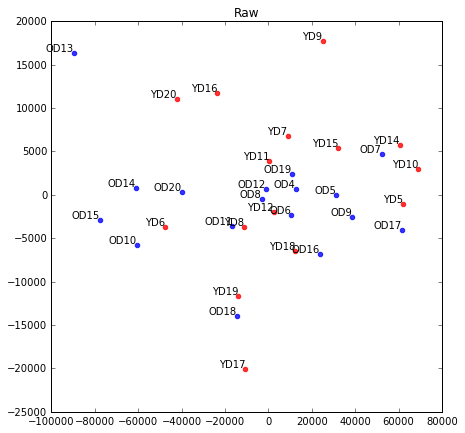

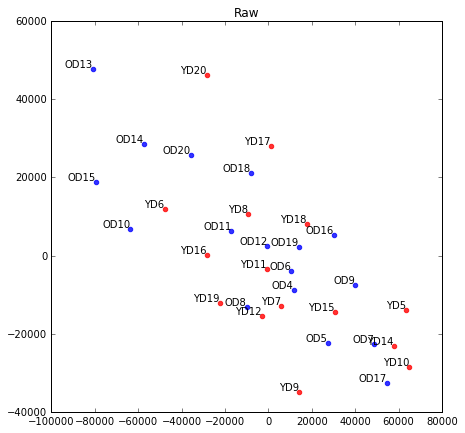

/Users/oleg/miniconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [131]:
FOLDER='/Volumes/WD/scratch/artyomov_lab_aging/Y10OD10/chipseq/processed/k4me1/k4me1_20vs20_reseq_bams_unique/coverages/YO_macs_broad_0.1/'
signal_df = pd.read_csv(FOLDER + 'YO_macs_broad_0.1_raw.csv')
signal = signal_df.drop(['chr', 'start', 'end', 'OD_input_unique', 'YD_input_unique'], axis=1).transpose()
signal_pca(signal, 'Raw')
signal_mds(signal, 'Raw')
signal_lda(signal, 'Raw')

explained variance ratio: [ 0.78238938  0.04020947]


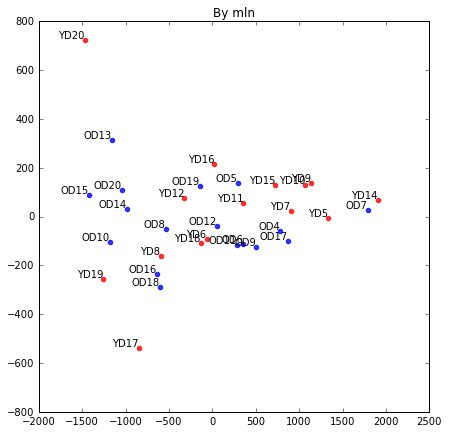

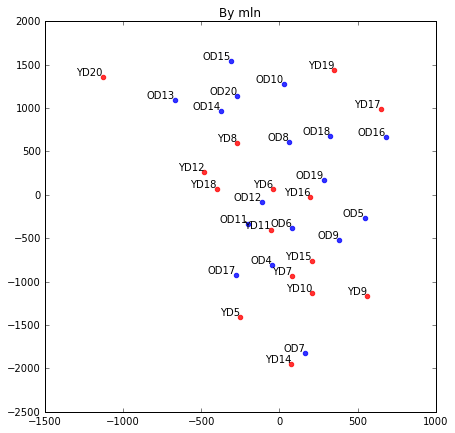

/Users/oleg/miniconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [132]:
signal_df = pd.read_csv(FOLDER + 'YO_macs_broad_0.1_by_mln.csv')
signal = signal_df.drop(['chr', 'start', 'end', 'OD_input_unique', 'YD_input_unique'], axis=1).transpose()
signal_pca(signal, 'By mln')
signal_mds(signal, 'By mln')
signal_lda(signal, 'By mln')

explained variance ratio: [ 0.75789036  0.04499402]


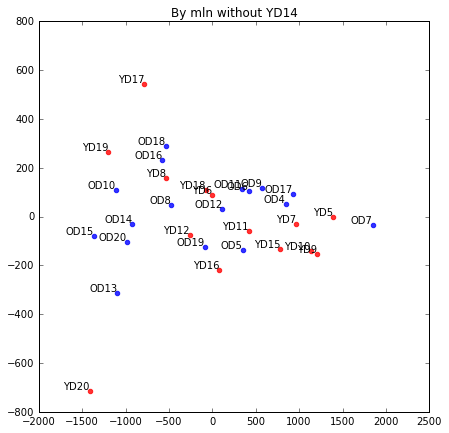

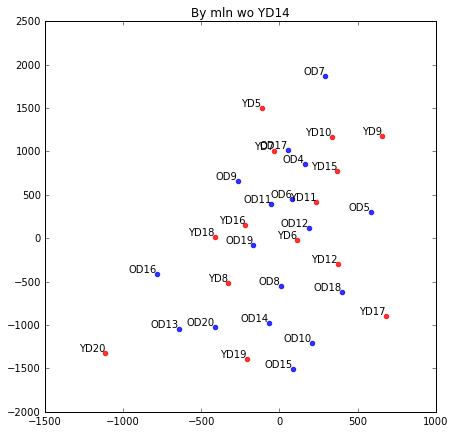

/Users/oleg/miniconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [133]:
signal = signal_df.drop(['chr', 'start', 'end', 'YD14_R1_hg19_unique', 'OD_input_unique', 'YD_input_unique'], axis=1).transpose()
signal_pca(signal, 'By mln without YD14')
signal_mds(signal, 'By mln wo YD14')
signal_lda(signal, 'By mln wo YD14')

explained variance ratio: [ 0.29977184  0.10238297]


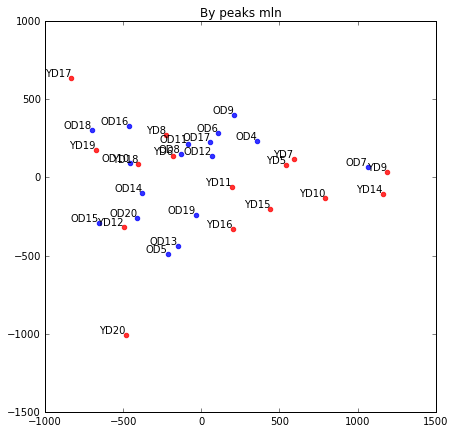

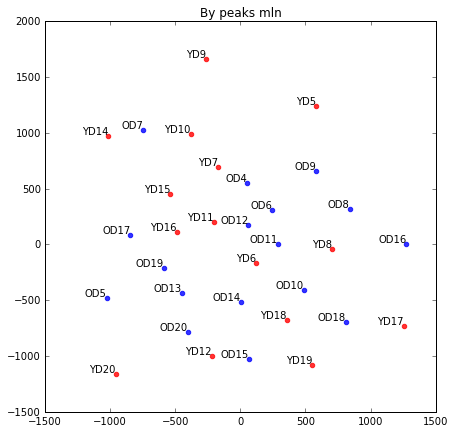

/Users/oleg/miniconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [134]:
signal_df = pd.read_csv(FOLDER + 'YO_macs_broad_0.1_by_peaks_mln.csv')
signal = signal_df.drop(['chr', 'start', 'end', 'OD_input_unique', 'YD_input_unique'], axis=1).transpose()
signal_pca(signal, 'By peaks mln')
signal_mds(signal, 'By peaks mln')
signal_lda(signal, 'By peaks mln')

explained variance ratio: [ 0.5021957   0.06678856]


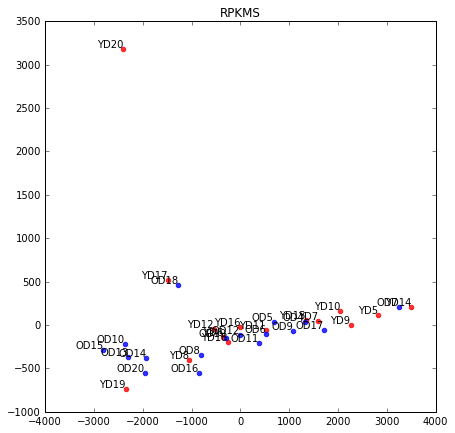

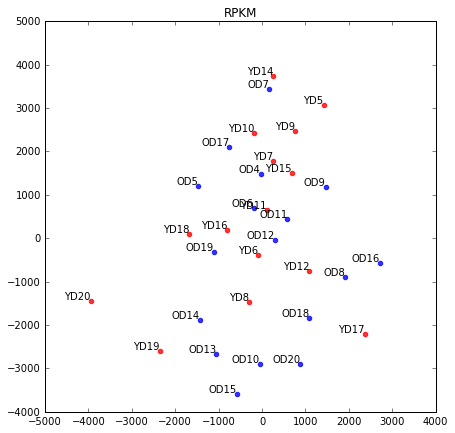

/Users/oleg/miniconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [135]:
signal_df = pd.read_csv(FOLDER + 'YO_macs_broad_0.1_rpkm.csv')
signal = signal_df.drop(['chr', 'start', 'end', 'OD_input_unique', 'YD_input_unique'], axis=1).transpose()
signal_pca(signal, 'RPKMS')
signal_mds(signal, 'RPKM')
signal_lda(signal, 'RPKM')